# Football Exploratory Data Analysis

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

### This Dataset contains Soccer World Cup History from 1930 to 2022

In [90]:
#Reading the data and storing it in a variable 
df=pd.read_csv('matches_1930_2022.csv')
df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#checking for datatypes
df.dtypes

home_team                           object
away_team                           object
home_score                           int64
home_xg                            float64
home_penalty                       float64
away_score                           int64
away_xg                            float64
away_penalty                       float64
home_manager                        object
home_captain                        object
away_manager                        object
away_captain                        object
Attendance                           int64
Venue                               object
Officials                           object
Round                               object
Date                                object
Score                               object
Referee                             object
Notes                               object
Host                                object
Year                                 int64
home_goal                           object
away_goal  

In [92]:
##View the shape of the dataset
rows=df.shape[0]
columns=df.shape[1]
print(f'The Football Datset has {rows} rows and {columns} columns')

The Football Datset has 964 rows and 44 columns


### Observing the Data

In [93]:
#previewing the first 5 rows of the dataset
df.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [94]:
##previewing the last 5 rows of the dataset
df.tail()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,France,Mexico,4,NaN,NaN,1,NaN,NaN,Raoul Caudron,Alexandre Villaplane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#listing the columns in the dataset
df.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [96]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [97]:
#checking for missing values
missing_values=df.isnull().sum()
missing_values[0:10]

home_team         0
away_team         0
home_score        0
home_xg         836
home_penalty    929
away_score        0
away_xg         836
away_penalty    929
home_manager      0
home_captain    320
dtype: int64

In [98]:
total_cells=df.shape[0]*df.shape[1] # Total number of cells in the DataFrame rows * columns
total_missing=missing_values.sum() # Total number of missing values in the DataFrame
missing_percentage=(total_missing/total_cells)*100 # Percentage of missing values in the DataFrame
print(f"Total missing values: {total_missing}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")



Total missing values: 20914
Percentage of missing values: 49.31%


In [99]:
#checking for duplicates
df.duplicated().sum()
df[df.duplicated()]


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long


-----------------------------------------------------------------------

### General Overview

• The dataset has 964 rows and 44 columns('home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long')

• 20914 missing values were found in the datset

-----------------------------------------------------------------------
### Exploratory Data Analysis

Run statistical summary of the Dataset

• Team-wise match outcome distribution and ranking based on wins.

• Ranking teams by total wins and draws, with visual comparisons of top performers.

• Attendance trend analysis by year and identification of top venues by total crowd size.

• Average goals per year



Match Results Analysis

In [100]:
#Statistical summary of the dataset
df.describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,964.000000,128.000000,35.000000,964.000000,128.000000,35.000000,964.000000,964.000000
mean,1.776971,1.435938,3.285714,1.044606,1.192187,3.057143,45693.374481,1989.244813
std,1.596676,0.860391,1.226459,1.071233,0.809258,1.136115,22704.131689,24.014409
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2000.000000,1930.000000
25%,1.000000,0.800000,3.000000,0.000000,0.600000,2.000000,31800.000000,1974.000000
50%,1.000000,1.300000,3.000000,1.000000,1.000000,3.000000,42725.000000,1994.000000
75%,3.000000,1.925000,4.000000,2.000000,1.525000,4.000000,60984.500000,2010.000000
max,10.000000,5.200000,5.000000,7.000000,5.700000,5.000000,173850.000000,2022.000000


### Data Cleaning Pipeline

To prepare the dataset for analysis,I created reusable cleaning functions and applied them using pipe()

In [101]:
def convert_date(df_results):
    df_results['Date']=pd.to_datetime(df_results['Date'],errors='coerce')
    return df_results

def get_results(df_results):
    conditions = [
        (df_results['home_score'] > df_results['away_score']),
        (df_results['home_score'] < df_results['away_score']),
        (df_results['home_score'] == df_results['away_score'])
    ]
    choices = ['Home Win', 'Away Win', 'Draw']

    results=np.select(conditions,choices,default='Unknown')

    df_results['Result'] = pd.Categorical(results, categories=choices, ordered=True)
    
    return df_results

def clean_column_names(df_results):
    
    cols_str = ['home_team','away_team', "Venue"]
    for col in cols_str:
        if col in df_results.columns:
            df_results[col] = df_results[col].str.strip().str.title()
    
    
    df_results.columns = df_results.columns.str.strip().str.title()

    
    return df_results

df=( 
    df
    .pipe(convert_date)
    .pipe(get_results)
    .pipe(clean_column_names)
               )


In [102]:
#preview the first 5 rows of the cleaned dataset
df.head()

,Home_Team,Away_Team,Home_Score,Home_Xg,Home_Penalty,Away_Score,Away_Xg,Away_Penalty,Home_Manager,Home_Captain,...,Away_Penalty_Shootout_Miss_Long,Home_Red_Card,Away_Red_Card,Home_Yellow_Red_Card,Away_Yellow_Red_Card,Home_Yellow_Card_Long,Away_Yellow_Card_Long,Home_Substitute_In_Long,Away_Substitute_In_Long,Result
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,Draw
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,Home Win
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,Home Win
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",Home Win
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,Home Win


In [103]:
#Quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Home_Team                        964 non-null    object        
 1   Away_Team                        964 non-null    object        
 2   Home_Score                       964 non-null    int64         
 3   Home_Xg                          128 non-null    float64       
 4   Home_Penalty                     35 non-null     float64       
 5   Away_Score                       964 non-null    int64         
 6   Away_Xg                          128 non-null    float64       
 7   Away_Penalty                     35 non-null     float64       
 8   Home_Manager                     964 non-null    object        
 9   Home_Captain                     644 non-null    object        
 10  Away_Manager                     964 non-null    object       

### EDA ANSWERS
The data was collected from 1930 to 2022

-----------------------------------------------------------------------



1) Team-wise match outcome distribution and ranking based on wins.

Result     Draw  Loss  Win
Team                      
Algeria       3     7    3
Angola        2     1    0
Argentina    17    24   47
Australia     4    12    4
Austria       4    13   12



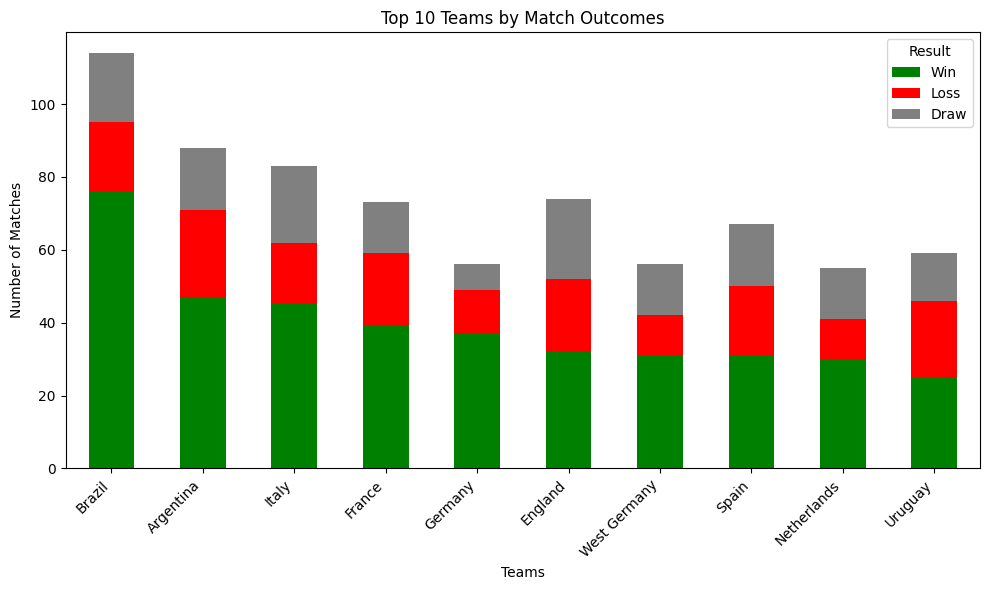

In [104]:
#Match results distribution (Home wins vs Away wins vs Draws)

home_results = df[['Home_Team', 'Result']].copy()
home_results.rename(columns={'Home_Team': 'Team'}, inplace=True)

away_results = df[['Away_Team', 'Result']].copy()
away_results.rename(columns={'Away_Team': 'Team'}, inplace=True)

home_results['Result'] = home_results['Result'].map({
    'Home Win': 'Win',
    'Away Win': 'Loss',
    'Draw': 'Draw'
})



# Flip results
away_results['Result'] = away_results['Result'].map({
    'Home Win': 'Loss',
    'Away Win': 'Win',
    'Draw': 'Draw'
})

all_results = pd.concat([home_results, away_results], ignore_index=True)
all_results

team_performance = all_results.groupby(['Team', 'Result']).size().unstack(fill_value=0)
print(team_performance.head())

print()



# Sort teams by number of wins and take top 10
top_teams = team_performance.sort_values(by="Win", ascending=False).head(10)


# Plot stacked bar chart (Wins, Losses, Draws)
top_teams[['Win', 'Loss', 'Draw']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['green', 'red', 'gray']
)

plt.title("Top 10 Teams by Match Outcomes")
plt.xlabel("Teams")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Result")
plt.tight_layout()
plt.show()




2) Ranking teams by total wins and draws, with visual comparisons of top performers

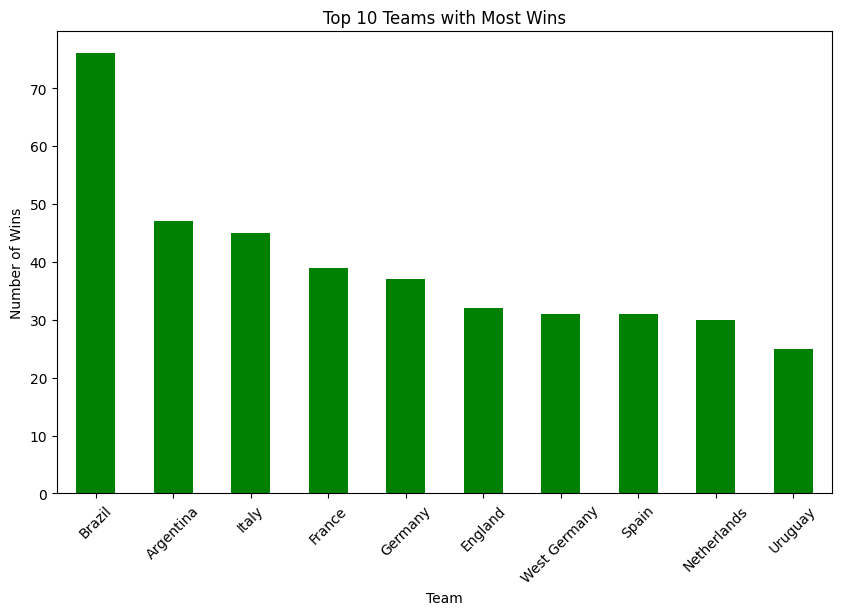

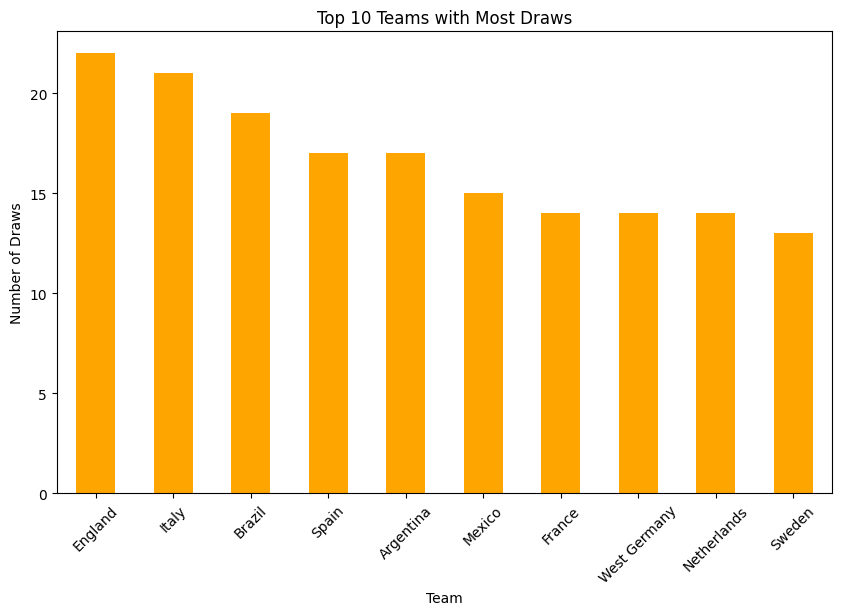

In [105]:
# Sort by number of Wins
top_wins = team_performance.sort_values('Win', ascending=False).head(10)

# Plot
top_wins['Win'].plot(kind='bar', figsize=(10,6), color='green')
plt.title("Top 10 Teams with Most Wins")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

# Sort by number of Draws
top_draws = team_performance.sort_values('Draw', ascending=False).head(10)

# Plot
top_draws['Draw'].plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Top 10 Teams with Most Draws")
plt.ylabel("Number of Draws")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

3) Attendance trend analysis by year and identification of top venues by total crowd size

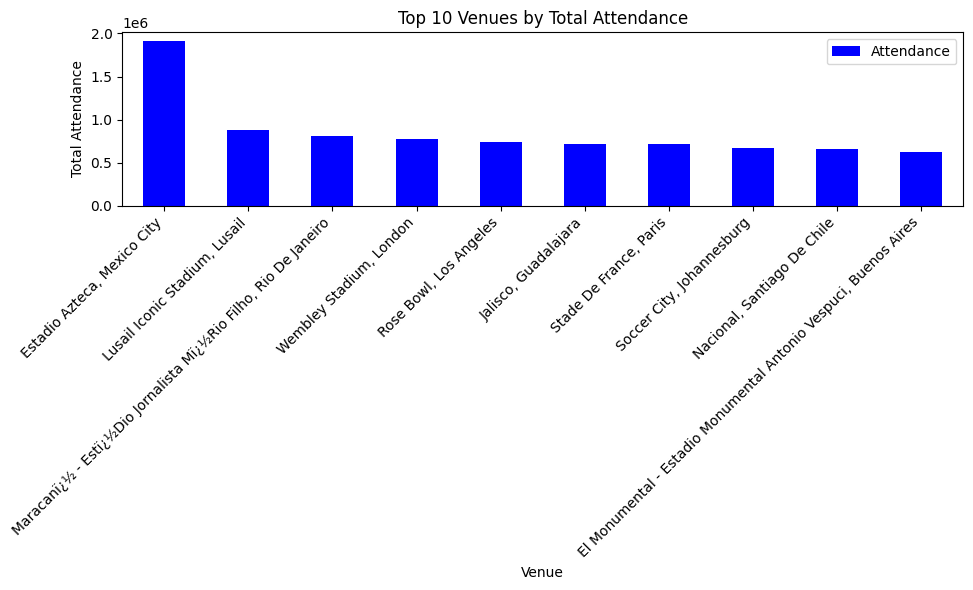

In [106]:
#Attendance analysis over the years
attendance_by_year = df.groupby('Year')['Attendance'].mean().round(2).reset_index()
attendance_by_year

#Biggest Venues by total attendance
total_attendance=df.groupby('Venue')['Attendance'].sum().reset_index()
biggest_venues=total_attendance.sort_values(by='Attendance', ascending=False).head(10)
biggest_venues

biggest_venues.plot(kind='bar', x='Venue', y='Attendance', figsize=(10,6), color='blue')
plt.title("Top 10 Venues by Total Attendance")
plt.ylabel("Total Attendance")
plt.xlabel("Venue")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()







4) Average goals per year

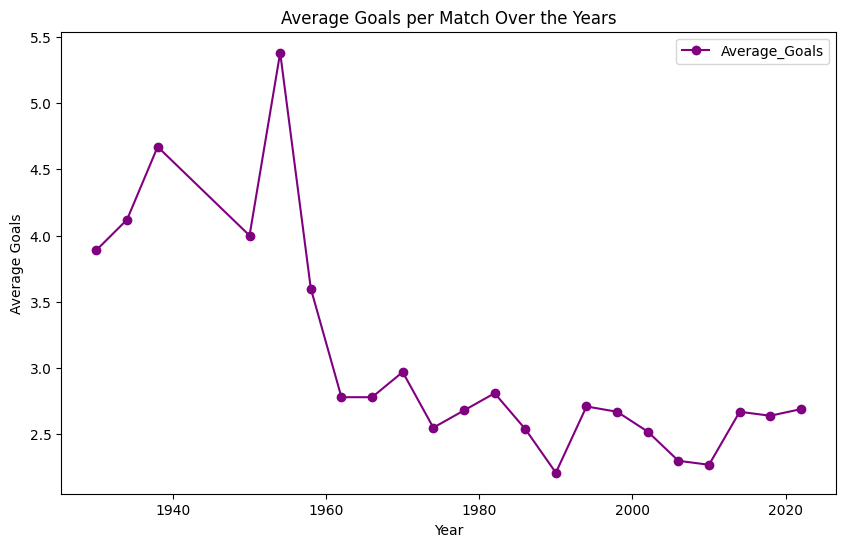

In [107]:
#average goals per year.
average_goals_per_year = (
    df.assign(Total_Goals = df['Home_Score'] + df['Away_Score'])
      .groupby('Year')['Total_Goals']
      .mean()
      .round(2)
      .reset_index(name='Average_Goals')
)



average_goals_per_year.plot(kind='line', x='Year', y='Average_Goals', marker='o', figsize=(10,6), color='purple')
plt.title("Average Goals per Match Over the Years")
plt.ylabel("Average Goals")
plt.xlabel("Year")
plt.show()


In [108]:
df.head(20).to_csv('cleaned_data_sample.csv',index=False)
